In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read the csv file into a DataFrame object
df=pd.read_csv("ds_salaries.csv")
df.head(3)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M


# Exploing ou data in order to understand it

In [4]:
df.dtypes

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [5]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [6]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [7]:
df.shape

(607, 12)



#                    Data  Cleaning and Transformation.
This dataset is relatively clean, but we will still need to ensure eveything is right and also perform data transformation.

In [8]:
# First we need to drop the column(Unname), it was the index of the data in csv format but right now we do not need it. 
df.drop(columns=["Unnamed: 0"], inplace = True)

In [9]:
df.head(4)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S


In [10]:
# We need to check if the data have null values.
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [11]:
# We also need to check the duplicate values in the data
df.duplicated().sum()

42

In [12]:
# Our data has 42 duplicate values we are going to remove them.
df.drop_duplicates().head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [13]:
# I think it is good to represent values in the right form for every one to understand the dataset some people may be confused with values(L, M, S). 
#So i have replaced the values in company_size to their corresponding  meaning.

df['company_size'] = df['company_size'].replace({'M':'Medium', 'L':'Large', 'S':'Small'})
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,Large
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,Small
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,Medium
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,Small
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,Large


# 1. Which country has the highest average salary of a data analyst?

In [14]:
df.job_title.nunique()
 

50

In [15]:
df.company_location.unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'CN',
       'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'ES', 'PT', 'DK', 'IT',
       'HR', 'LU', 'PL', 'SG', 'RO', 'IQ', 'BR', 'BE', 'UA', 'IL', 'RU',
       'MT', 'CL', 'IR', 'CO', 'MD', 'KE', 'SI', 'CH', 'VN', 'AS', 'TR',
       'CZ', 'DZ', 'EE', 'MY', 'AU', 'IE'], dtype=object)

In [16]:
df_job=df.groupby('job_title')

In [17]:
df_da = df_job.get_group('Data Analyst')
df_countries = df_da.groupby("company_location")["salary_in_usd"].mean().sort_values(ascending=False)
df_countries

company_location
US    107674.154930
CA     81487.333333
DE     63831.000000
FR     52930.500000
GB     50875.600000
GR     32313.333333
ES     29098.000000
NG     10000.000000
PK      8000.000000
IN      6072.000000
Name: salary_in_usd, dtype: float64

In [18]:

keys = [company_location for company_location, df in df_da.groupby(['company_location'])]
keys

['CA', 'DE', 'ES', 'FR', 'GB', 'GR', 'IN', 'NG', 'PK', 'US']

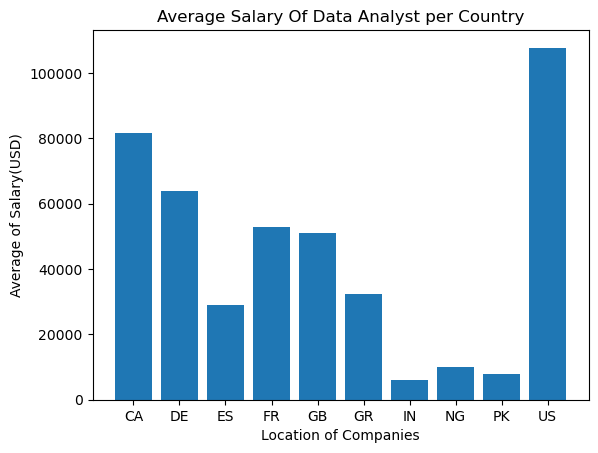

In [19]:
plt.bar(keys,df_da.groupby("company_location")["salary_in_usd"].mean())
plt.title("Average Salary Of Data Analyst per Country")
plt.xlabel("Location of Companies")
plt.ylabel("Average of Salary(USD)")
plt.show()

Looking at the gragh we can conclude that Data Analysts have a high average salary in USA compared to other countries. 
The other countries that Data Analysts are paid at least above 50k is Canada, Denmark, France and Great Britain.

# 2)  Among the three categories of company_size which is the most common and preverable to work in?  

In [20]:
df_company_size = df.groupby('company_size')

In [21]:
df_company_size.job_title.count()

company_size
Large     198
Medium    326
Small      83
Name: job_title, dtype: int64

In [22]:
company_size_keys=[company_size for company_size, df in df_da.groupby(['company_size'])]
company_size_keys

['Large', 'Medium', 'Small']

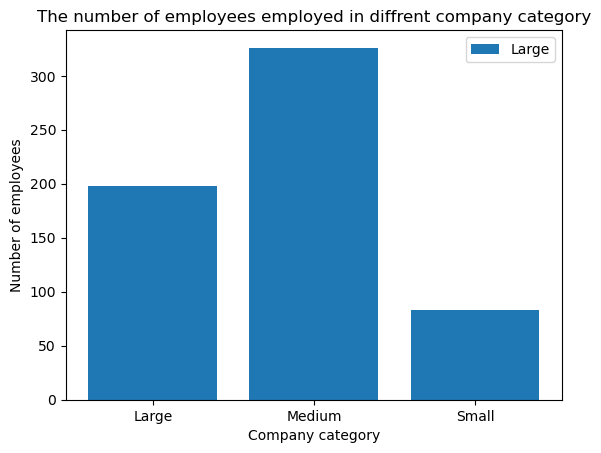

In [23]:
# The number of employees that are employed per each company category
plt.bar(company_size_keys, df_company_size.job_title.count())
plt.title("The number of employees employed in diffrent company category")
plt.xlabel("Company category")
plt.ylabel("Number of employees")
plt.legend(company_size_keys)
plt.show()

In [24]:
# Comparing the min, max, and average salary for the three categories of companies.
df_company_size.salary_in_usd.aggregate([max, min, 'mean'])

,max,min,mean
company_size,,,
Large,600000,5882,119242.994949
Medium,450000,4000,116905.466258
Small,416000,2859,77632.674699


# Analysis conclusion
a) From the graph above it is clear that most employee are employed in medium companies. 
Hence companies that lies in the medium category are the most common in most countries, compared to large and small.

b) From the above analysis it is clear that most companies that lies in Large category have high maximum, minimum and mean salary.
So for employee seeking for a better renumeration Large companies will be the most prevarable.


# 3) Compare the growth of remote working from 2020 to 2022? 

In [25]:
df_ratio=df.groupby(['remote_ratio'])
df_ratio2=df_ratio.get_group(100).groupby('work_year')['remote_ratio'].count()
df_ratio2

work_year
2020     36
2021    117
2022    228
Name: remote_ratio, dtype: int64

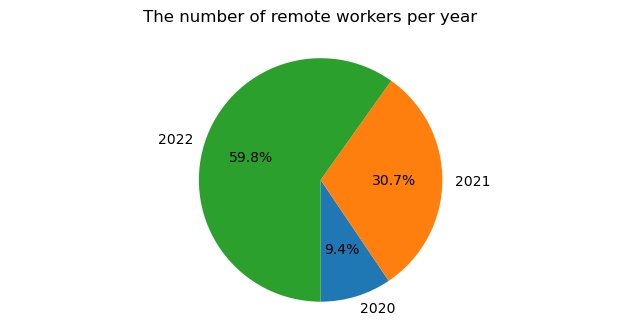

In [26]:

labels=[2020,2021,2022] 
colrs=['black', 'gray', 'blue']
# --- the plot
fig, ax = plt.subplots(figsize=(8, 3.5))
ax.pie(df_ratio2,
 labels=labels, autopct='%1.1f%%', 
 startangle=270)
ax.axis('equal') # keep it a circle
# --- tidy-up and save
fig.suptitle('The number of remote workers per year')
fig.savefig('filename.png', dpi=125)

# Conclusion
It is clear from the pie chart above thee is a trend that clearly indicate many employee are embracing remote working since 2020.
This may be due to Covid19 pademic that forced people to work at home.

# 4) Which Job_title are most common in all countries

In [63]:
df_title=df.groupby(['job_title'])['work_year'].count() #group the job_title 
df_title_top10=df_title.sort_values(ascending=False) # sort the values from the largest to the smallest
df_title_top10 = df_title_top10.iloc[:10] #we choose the top 10 job types with respect to the number of employees
df_title_top10

job_title
Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Big Data Engineer               8
Machine Learning Scientist      8
Director of Data Science        7
Name: work_year, dtype: int64

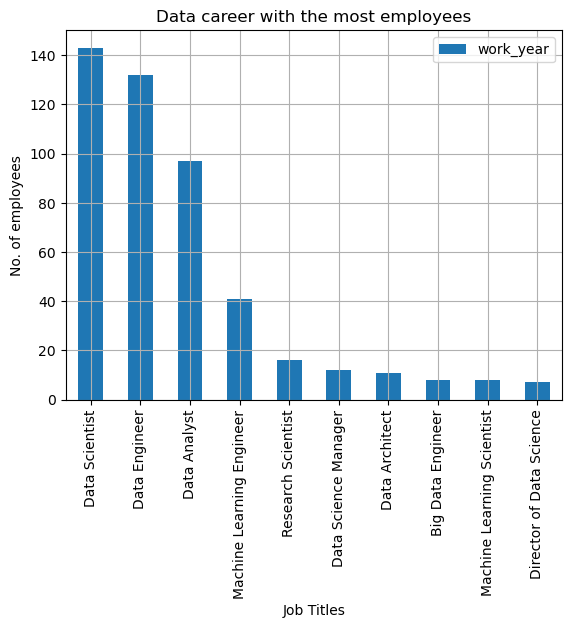

In [78]:
df_title_top10.plot(kind='bar')
plt.title('Data career with the most employees')
plt.ylabel('No. of employees')
plt.xlabel('Job Titles')
plt.grid()
plt.legend()
plt.show()